In [1]:
from knowknow import *

In [2]:
db = Dataset('sociology-wos-74b')

loading variable sociology-wos-74b/groups from disk
loading variable sociology-wos-74b/_attributes from disk
loading variable sociology-wos-all/groups from disk
loading variable sociology-wos-all/_attributes from disk


# filtered journal summaries

In [15]:
viz.yearly_counts?

Signature:
viz.yearly_counts(
    names,
    dataset,
    myname=None,
    overwrite=True,
    markers={},
    print_names=None,
    ctype='c',
    yearly_prop=False,
    xlim=None,
    cols=5,
    rows_per_group=2,
    count_unit='doc',
    label_num='max',
)
Docstring: <no docstring>
File:      g:\my drive\2020 organisation\1. projects\qualitative analysis of literature\110 citation analysis\010 analyses\bundle 100 - knowknow reboot 10-2020\knowknow\viz.py
Type:      function


In [20]:
db.set_attribute('RELIABLE_DATA_STARTS_HERE', 1930)

acta sociologica
american journal of economics and sociology
american journal of sociology
american sociological review
annals of tourism research
anthrozoos
archives europeennes de sociologie
armed forces & society
british journal of sociology
Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


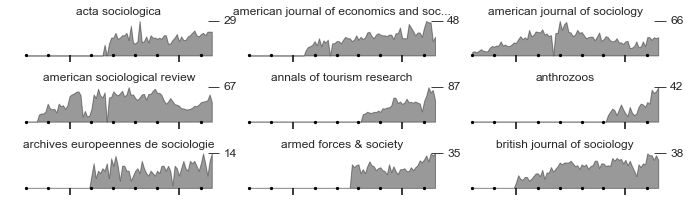

british journal of sociology of education
canadian journal of sociology-cahiers canadiens de sociologie
comparative studies in society and history
contributions to indian sociology
deviant behavior
discourse & society
economy and society
ethnic and racial studies
european sociological review
Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


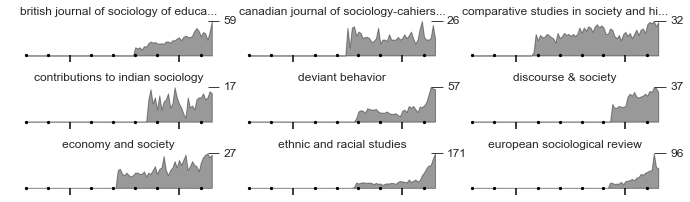

gender & society
human ecology
human studies
international journal of intercultural relations
international sociology
journal for the scientific study of religion
journal of contemporary ethnography
journal of health and social behavior
journal of historical sociology
Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


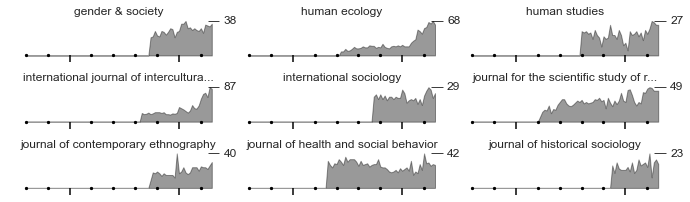

journal of law and society
journal of leisure research
journal of marriage and family
journal of mathematical sociology
journal of the history of sexuality
language in society
law & society review
leisure sciences
media culture & society
Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


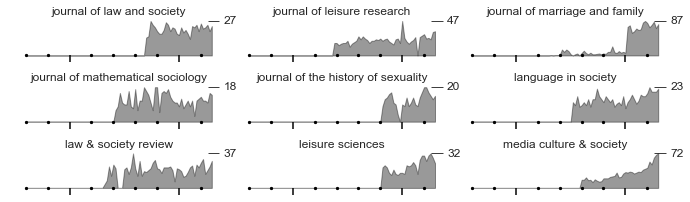

poetics
politics & society
population and development review
race & class
rationality and society
review of religious research
rural sociology
social compass
social forces
Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


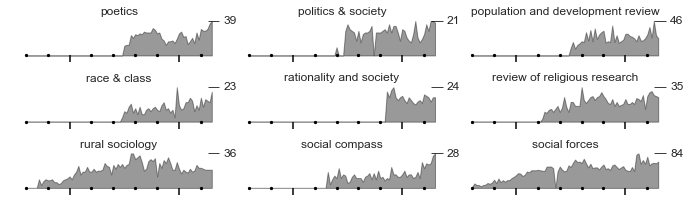

social indicators research
social networks
social problems
social science quarterly
social science research
society
society & natural resources
sociologia
sociologia ruralis
Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


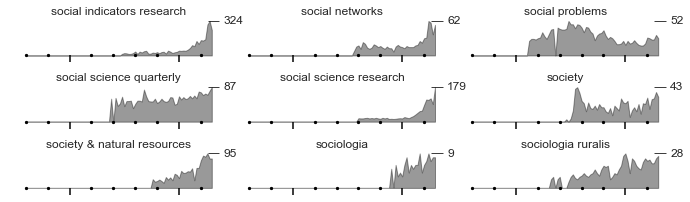

sociological forum
sociological inquiry
sociological methods & research
sociological perspectives
sociological quarterly
sociological review
sociological spectrum
sociological theory
sociology of education
Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


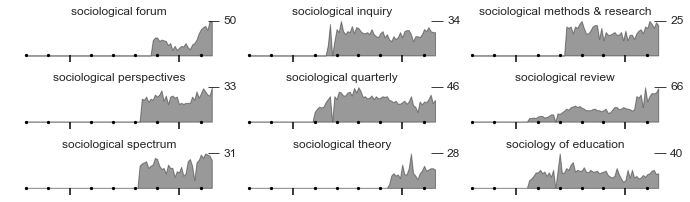

sociology of health & illness
sociology of religion
sociology of sport journal
sociology-the journal of the british sociological association
symbolic interaction
teaching sociology
theory and society
work and occupations
work employment and society
Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


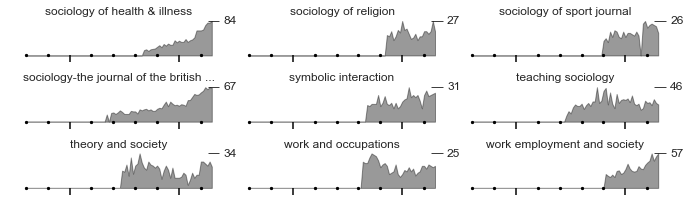

youth & society
Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


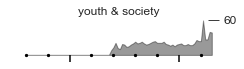

In [21]:
viz.yearly_counts(
    db.items('fj'),
    db,
    ctype='fj',
    myname='journal_yearly',
    cols=3,
    rows_per_group=3
)

In [22]:
sum(db.by('c').docs.values()) / sum(db.by('c').cits.values())

0.9887488410387754

In [19]:
jc = db.by('c','fj').docs

loading variable sociology-wos-74b/doc ___ c.fj from disk


# journal table summary

In [23]:
jj = db.items('fj')[0]

In [24]:
db.name

'sociology-wos-74b'

In [26]:
db.set_attribute('RELIABLE_DATA_STARTS_HERE', 1900)
db2.set_attribute('RELIABLE_DATA_STARTS_HERE', 1900)
dball.set_attribute('RELIABLE_DATA_STARTS_HERE', 1900)

In [27]:
#byjy_d = db.by('fj','fy').docs
#byjy_i = db.by('fj','fy').docs
#cnti = get_cnt("%s.ind" % database_name, ['fj','fj.fy'])

rows = []
header = [
    ["Journal Name"] + ["First","# Documents","# Citations",'Cits/Doc']
]

excluded_journals = []
included_journals = []

keepmxmn = (-1, 1e8)

for j in sorted( db.items('fj') ):
    
    # get the years for which there is a positive count of BIBLIOGRAPHIES
    ys = set( y for y,c in db.trend('fj', j)._c.items() if c > 0 )
    rg = max(ys) - min(ys)

    mx,mn = keepmxmn
    keepmxmn = max( max(ys), mx ), min( min(ys), mn )

    rows.append([
        j.title(), 
        min(ys),
        db(fj = j).docs,
        db(fj = j).cits,
        "%0.1f" % (db(fj = j).cits / db(fj = j).docs)
    ])

rows = sorted(rows, key=lambda x: x[0])

rows.append([
    "TOTAL",
    keepmxmn[1],
    sum( x[2] for x in rows ),
    sum( x[3] for x in rows ),
    sum( x[3] for x in rows )/sum( x[2] for x in rows )
])

#print("%s journals selected" % len(rows))
#print("The following journals were excluded: ", ", ".join('"%s"'%x for x in sorted(excluded_journals)))
#print("Included journals array: %s" % included_journals)

#save_variable( "%s.included_journals"%database_name, included_journals )

inc = 45

to_prettify = ['{}'] + ['{}'] + ['{0:,}']*2
for i,r in enumerate(rows):
    for j,p in enumerate(to_prettify):
        rows[i][j] = p.format(r[j])


for i,rstart in enumerate(range(0,len(rows),inc)):
    myrows = rows[rstart:rstart+inc]

    if False:
        save_table(
            "journal_table_%s" % (i), 
            myrows, 
            headers=header,
            widths=np.array([7]+[1]*8),
            columns=2,
            caption="\n".join([
                "Journal summary, '%s' through '%s'" % (myrows[0][0], myrows[-1][0])
            ])
        )

    tbl = tabulate(myrows, tablefmt='html', headers=header[0])
    #save_table_html(tbl, "Journal Summary (%s)" % database_name)
    display(HTML( tbl ))

#plot_count_series(
#    included_journals, database_name, 
#    myname="Number of documents with citations by journal (%s, cits)"%database_name, 
#    print_names=lambda j:j.lower(),
#    overwrite=True, markers={}, 
#    ctype='fj', yearly_prop=False,
#    count_unit='ind')

Journal Name,First,# Documents,# Citations,Cits/Doc
Acta Sociologica,1966,860,"14,167",16.5
American Journal Of Economics And Sociology,1956,"1,643","12,582",7.7
American Journal Of Sociology,1900,"2,792","61,449",22
American Sociological Review,1936,"3,353","77,147",23
Annals Of Tourism Research,1982,"1,793","29,914",16.7
Anthrozoos,1992,634,"6,336",10
Archives Europeennes De Sociologie,1960,482,"6,224",12.9
Armed Forces & Society,1977,"1,002","7,030",7
British Journal Of Sociology,1950,"1,741","27,954",16.1
British Journal Of Sociology Of Education,1980,"1,272","18,414",14.5


Journal Name,First,# Documents,# Citations,Cits/Doc
Social Indicators Research,1974,"3,936","59,533",15.1
Social Networks,1978,"1,043","21,993",21.1
Social Problems,1956,"1,879","40,149",21.4
Social Science Quarterly,1969,"3,102","41,168",13.3
Social Science Research,1980,"1,888","55,068",29.2
Society,1973,993,"3,360",3.4
Society & Natural Resources,1988,"1,596","17,236",10.8
Sociologia,1995,158,"1,699",10.8
Sociologia Ruralis,1966,849,"9,719",11.4
Sociological Forum,1988,842,"22,199",26.4


# number of unique authors etc

In [34]:
loops = [
    ('ta','cited authors'),
    ('fa','writing authors'),
    ('c','cited works'),
    ('ffa','first writing authors'),
]

Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


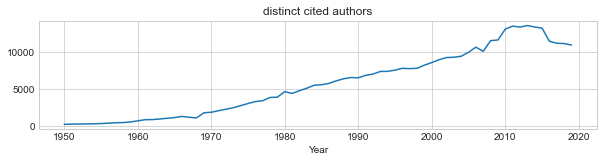

Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


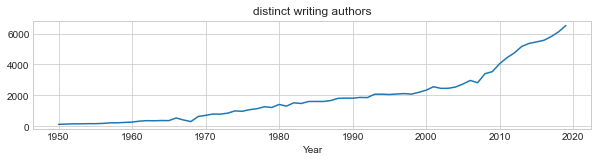

Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


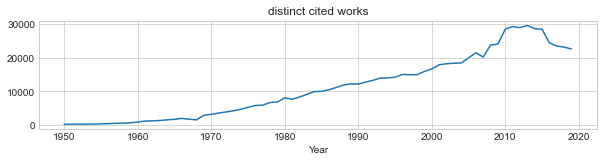

loading variable sociology-wos-74b/doc ___ ffa.fy from disk
Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


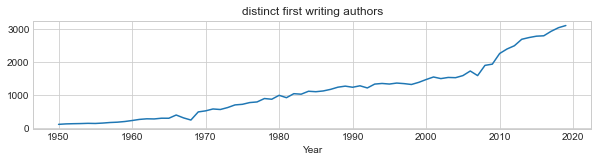

In [35]:
for typ, name in loops:

    c = db.by('fy',typ).docs
    ns = []
    years = range(1950,2020)
    for Y in years:
        a = set(getattr(comb, typ) for comb,y in c.items() if y>0 and comb.fy==Y)
        n = len(a)
        ns.append(n)

    plt.figure(figsize=(10,2))

    plt.plot(years,ns)
    plt.xlabel('Year')
    plt.title('distinct %s' % name)

    db.save_figure('unique.%s'%name)
    plt.show()

# journals being created, and after 2000 more papers are published

In [14]:
journals = db.items('fj')

loading variable sociology-wos-74b/ind ___ fj from disk


In [13]:
from random import random

journal_by_year = db(fy=None).cits

loading variable sociology-wos-74b/ind ___ fy from disk


loading variable sociology-wos-74b/ind ___ fj.fy from disk


(1900.0, 2020.0)

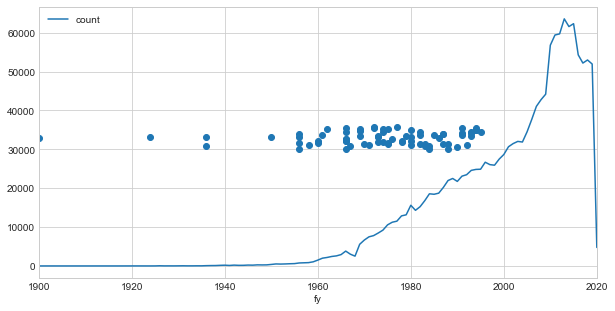

In [15]:
fig,ax = plt.subplots(figsize=(10,5))
journal_by_year.plot('fy','count', ax=ax)

ax.scatter([db.trend('fj',j).first for j in journals],[30000*(1+random()*0.2) for j in journals])
plt.xlim(1900,2020)

In [16]:
sm = defaultdict(int)
total = defaultdict(int)

for x in db.items('c'):
    t = db.trend('c', x)
    
    if t.first > 2010:
        continue
    
    sm[t.first] += sum( t.cits(t.first,t.first+5) )
    total[ t.first ] += 1

loading variable sociology-wos-74b/ind ___ c.fy from disk


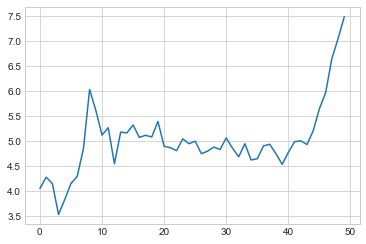

In [17]:
plt.plot([sm[yy]/total[yy] for yy in range(1960,2010)])